# Importing packages

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib inline

# plotly library
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Importing Warnings

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Function to find the best score

In [3]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

# Function to find the Classsification_report and Accuracy

In [4]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    
    return acc_sc

# Function to find Confuction_matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

# Getting the data

In [9]:
X_test = pd.read_csv("/home/birnesh/Documents/MNIST/inputs/test.csv")
train = pd.read_csv("/home/birnesh/Documents/MNIST/inputs/train.csv")
sample_sub = pd.read_csv("/home/birnesh/Documents/MNIST/inputs/sample_submission.csv")
y_train = train["label"]
X_train = train.drop(["label"],axis = 1)
del train
gc.collect()

25

# Normalizing the data

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

# Spliting the train data for validation

In [11]:
X_train, X_val, y_train , y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0)
param_grid = {'C': [0.014, 0.012], 'multi_class': ['multinomial'],  
              'penalty': ['l1'],'solver': ['saga'], 'tol': [0.1] }
Grid_LR = GridSearchCV(clf_LR, param_grid, verbose=1, cv=5, n_jobs=-1)
Grid_LR.fit(X_train,y_train)
score_grid_LR = get_best_score(Grid_LR)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   29.7s remaining:   19.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.2s finished


0.8744940476190476
{'C': 0.014, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1}
LogisticRegression(C=0.014, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=0, solver='saga',
          tol=0.1, verbose=0, warm_start=False)


In [13]:
pred_val_lr = Grid_LR.predict(X_val)
acc_lr = print_validation_report(y_val, pred_val_lr)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       816
           1       0.90      0.98      0.94       909
           2       0.89      0.85      0.87       846
           3       0.89      0.82      0.85       937
           4       0.84      0.91      0.87       839
           5       0.81      0.81      0.81       702
           6       0.88      0.91      0.89       785
           7       0.89      0.88      0.89       893
           8       0.89      0.82      0.85       835
           9       0.83      0.85      0.84       838

   micro avg       0.88      0.88      0.88      8400
   macro avg       0.88      0.88      0.88      8400
weighted avg       0.88      0.88      0.88      8400

Accuracy : 0.8773809523809524


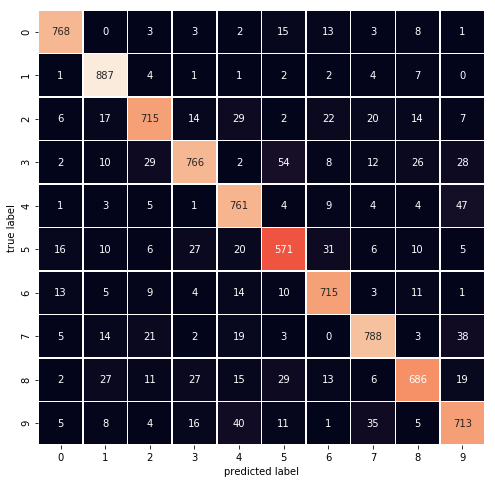

In [14]:
plot_confusion_matrix(y_val, pred_val_lr)

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
clf_knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform')

In [16]:
pred_val_knn = clf_knn.predict(X_val)
acc_knn = print_validation_report(y_val, pred_val_knn)

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       816
           1       0.93      1.00      0.96       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.96      0.97       839
           5       0.95      0.95      0.95       702
           6       0.97      0.99      0.98       785
           7       0.95      0.96      0.96       893
           8       0.98      0.91      0.95       835
           9       0.94      0.95      0.95       838

   micro avg       0.96      0.96      0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Accuracy : 0.9616666666666667


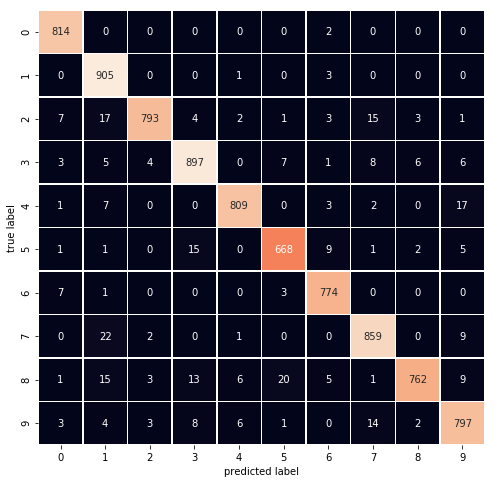

In [17]:
plot_confusion_matrix(y_val, pred_val_knn)

# Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(random_state=0)
param_grid = {'max_depth': [15], 'max_features': [100],  
              'min_samples_split': [5],'n_estimators' : [50] }
GridCV_RF = GridSearchCV(clf_RF, param_grid, verbose=1, cv=5,n_jobs=-1)
GridCV_RF.fit(X_train,y_train)
score_grid_RF = get_best_score(GridCV_RF)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.1s remaining:   40.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.2s finished


0.955922619047619
{'max_depth': 15, 'max_features': 100, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [19]:
pred_val_rf = GridCV_RF.predict(X_val)
acc_rf = print_validation_report(y_val, pred_val_rf)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       816
           1       0.97      0.99      0.98       909
           2       0.95      0.95      0.95       846
           3       0.96      0.93      0.94       937
           4       0.95      0.96      0.96       839
           5       0.95      0.94      0.95       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

   micro avg       0.96      0.96      0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Accuracy : 0.9569047619047619


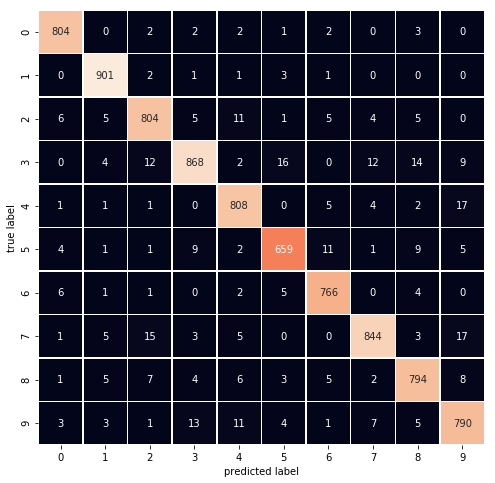

In [18]:
plot_confusion_matrix(y_val, pred_val_rf)

# Support Vector Machine

In [19]:
from sklearn.svm import SVC
clf_svm = SVC(C=5, gamma=0.05, kernel='rbf', random_state=0)
clf_svm.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
pred_val_svm = clf_svm.predict(X_val)
acc_svm = print_validation_report(y_val, pred_val_svm)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.97      0.98      0.98       846
           3       0.98      0.97      0.98       937
           4       0.97      0.98      0.98       839
           5       0.98      0.97      0.98       702
           6       0.98      0.99      0.99       785
           7       0.99      0.98      0.98       893
           8       0.97      0.98      0.97       835
           9       0.98      0.97      0.97       838

   micro avg       0.98      0.98      0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400

Accuracy : 0.98


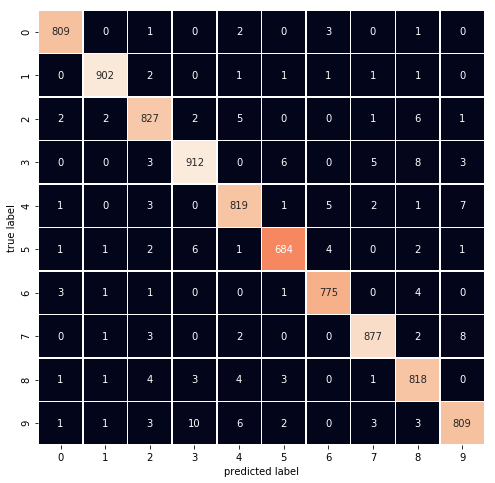

In [21]:
plot_confusion_matrix(y_val, pred_val_svm)

# Logistoic Regression fitting best parameters with the entire train set

In [20]:
print(Grid_LR.best_params_)
Grid_LR.best_estimator_.fit(X_train,y_train)

{'C': 0.014, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1}


LogisticRegression(C=0.014, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=0, solver='saga',
          tol=0.1, verbose=0, warm_start=False)

In [21]:
pred_test_lr = Grid_LR.best_estimator_.predict(X_test)
result_lr = pd.DataFrame({'ImageId':sample_sub.ImageId, 'Label':pred_test_lr})
result_lr.to_csv("subm_lr.csv",index=False)

# KNN

In [22]:
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform')

In [24]:
pred_test_knn = clf_knn.predict(X_test)
result_knn = pd.DataFrame({'ImageId':sample_sub.ImageId, 'Label':pred_test_knn})
result_knn.to_csv("subm_knn.csv",index=False)

# Random Forest 

In [25]:
print(GridCV_RF.best_params_)
GridCV_RF.best_estimator_.fit(X_train,y_train)

{'max_depth': 15, 'max_features': 100, 'min_samples_split': 5, 'n_estimators': 50}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
pred_test_rf = GridCV_RF.best_estimator_.predict(X_test)
result_rf = pd.DataFrame({'ImageId':sample_sub.ImageId, 'Label':pred_test_rf})
result_rf.to_csv("subm_rf.csv",index=False)

# SVM 

In [ ]:
clf_svm.fit(X_train,y_train)

In [ ]:
pred_test_svm = clf_svm.predict(X_test)
result_svm = pd.DataFrame({'ImageId':sample_sub["ImageId"], 'Label':pred_test_svm})
result_svm.to_csv("subm_svm.csv",index=False)

In [29]:
classifier_list = ['LR', 'KNN', 'RAD_FOREST']
val_scores = [acc_lr, acc_knn, acc_rf]
score_lr    = 0.88700
score_knn   = 0.96557
score_rf    = 0.96028
test_scores = [score_lr, score_knn, score_rf]

In [36]:
trace1 = go.Scatter(x = classifier_list, y = val_scores,
                   name="Validation", text = classifier_list)
trace2 = go.Scatter(x = classifier_list, y = test_scores,
                   name="Submission", text = classifier_list)

data = [trace1, trace2]

layout = dict(title = "Validation and Submission Scores", 
              xaxis=dict(ticklen=10, zeroline= False),
              yaxis=dict(title = "Accuracy", side='left', ticklen=10,),                                  
              legend=dict(orientation="v", x=1.05, y=1.0),
              autosize=False, width=750, height=500,
              )

fig = dict(data = data, layout = layout)
iplot(fig)  